# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Dicry Sirot Nur Fahmi
- **Email:** dicryfahmy@gmail.com
- **ID Dicoding:** fahmi1112

## Menentukan Pertanyaan Bisnis

- Pengaruh PM2.5, SO2, CO terhadap curah hujan di udara distrik Gucheng?
- Bagaimana tren curah hujan pada tiap bulannya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
air_quality_df = pd.read_csv('https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv')
air_quality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


### Assessing Data

In [ ]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
air_quality_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,646
PM10,381
SO2,507
NO2,668
CO,1401


In [ ]:
print("Jumlah duplikasi: ", air_quality_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
air_quality_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM2.5,34418.0,83.852089,82.796445,2.0000,24.00,60.0,115.75,770.0
PM10,34683.0,118.861978,96.742626,2.0000,45.00,99.0,167.00,994.0
SO2,34557.0,15.366162,21.204526,0.2856,2.00,7.0,20.00,500.0
NO2,34396.0,55.871075,36.473860,2.0000,26.00,50.0,79.00,276.0
CO,33663.0,1323.974423,1208.957772,100.0000,600.00,900.0,1600.00,10000.0


**Insight:**
- Terdapat missing value pada data
- Tidak terdapat duplikasi data

### Cleaning Data

In [ ]:
air_quality_df = air_quality_df[['year','month','day','hour','PM2.5','SO2','CO','RAIN']]

In [ ]:
air_quality_df = air_quality_df.interpolate(method='linear',limit_direction='forward')

In [ ]:
air_quality_df.isna().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,0
SO2,0
CO,0
RAIN,0


**Insight:**
- Memilah data yang dipakai
- mengisi missing data menggunakan teknik interpolasi untuk memperkirakan nilai di antara titik-titik data yang diketahui.


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
air_quality_df.describe(include='all')

,year,month,day,hour,PM2.5,SO2,CO,RAIN
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2014.662560,6.522930,15.729637,11.500000,84.074802,15.705821,1338.100060,0.064374
std,1.177213,3.448752,8.800218,6.922285,82.994634,23.282583,1214.044983,0.838142
min,2013.000000,1.000000,1.000000,0.000000,2.000000,0.285600,100.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,24.000000,2.000000,600.000000,0.000000
50%,2015.000000,7.000000,16.000000,11.500000,60.000000,7.000000,985.714286,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,116.000000,20.000000,1680.652174,0.000000
max,2017.000000,12.000000,31.000000,23.000000,770.000000,500.000000,10000.000000,41.900000


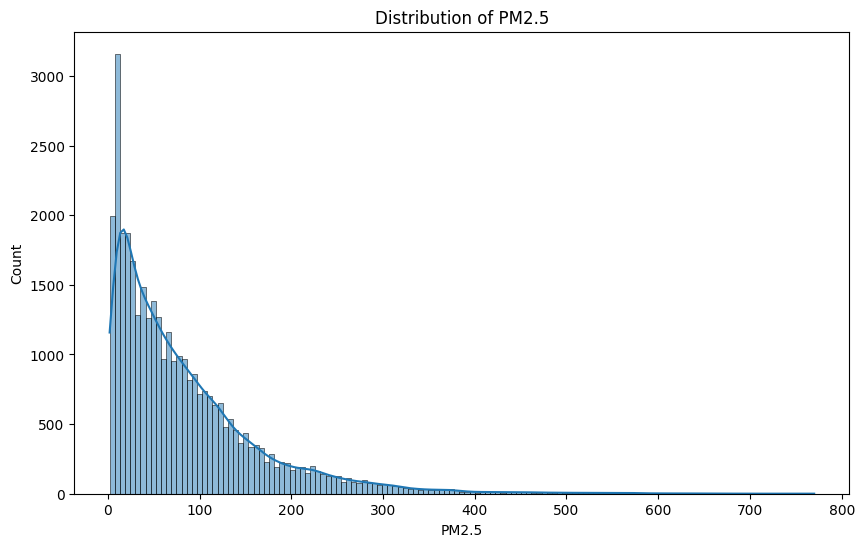

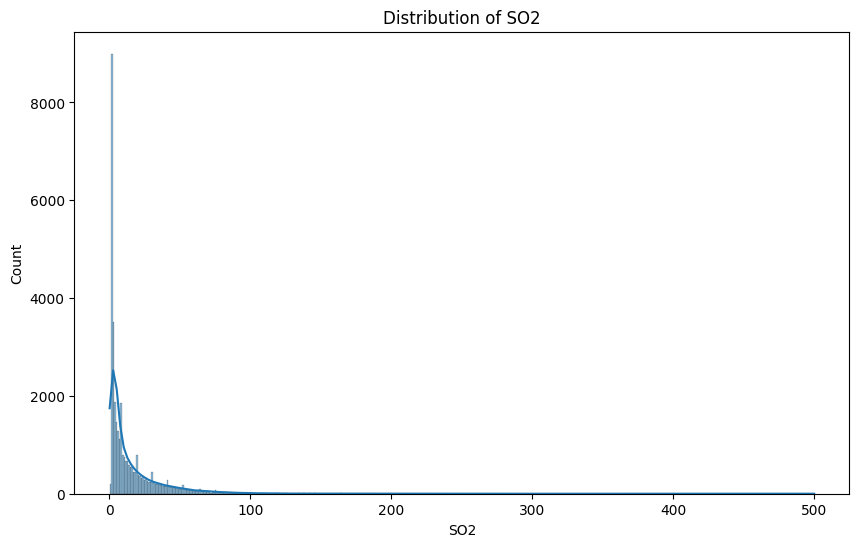

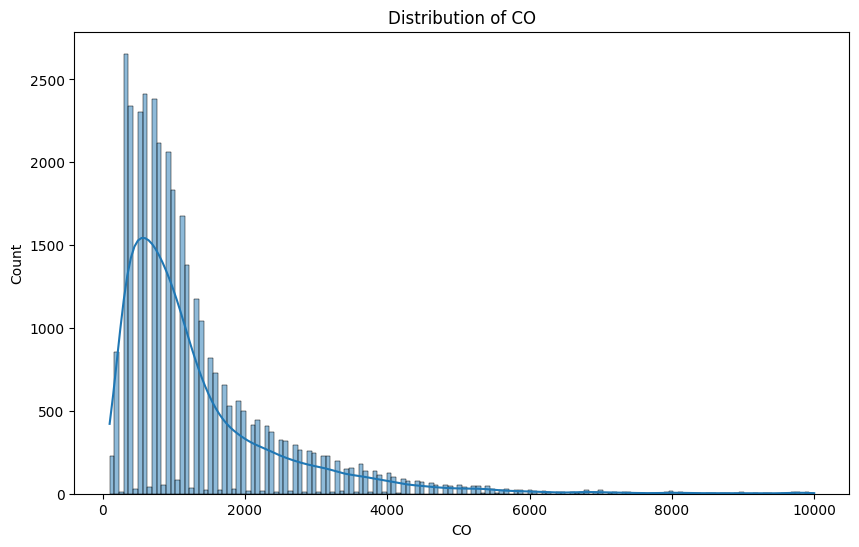

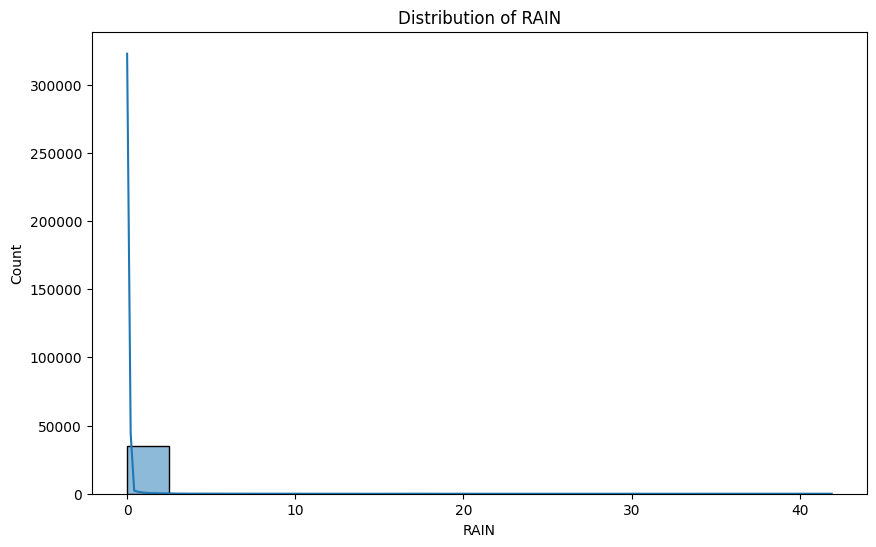

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=air_quality_df, x='PM2.5', kde=True)
plt.title('Distribution of PM2.5')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=air_quality_df, x='SO2', kde=True)
plt.title('Distribution of SO2')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=air_quality_df, x='CO', kde=True)
plt.title('Distribution of CO')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=air_quality_df, x='RAIN', kde=True)
plt.title('Distribution of RAIN')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

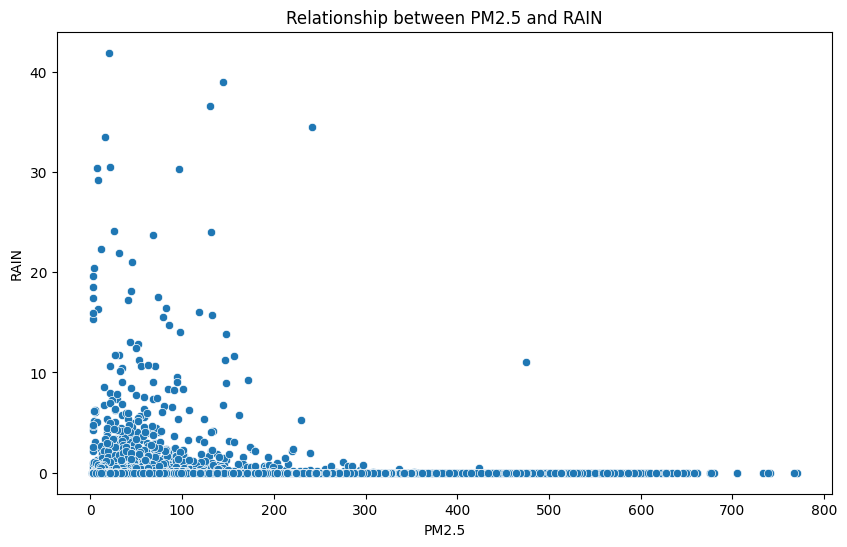

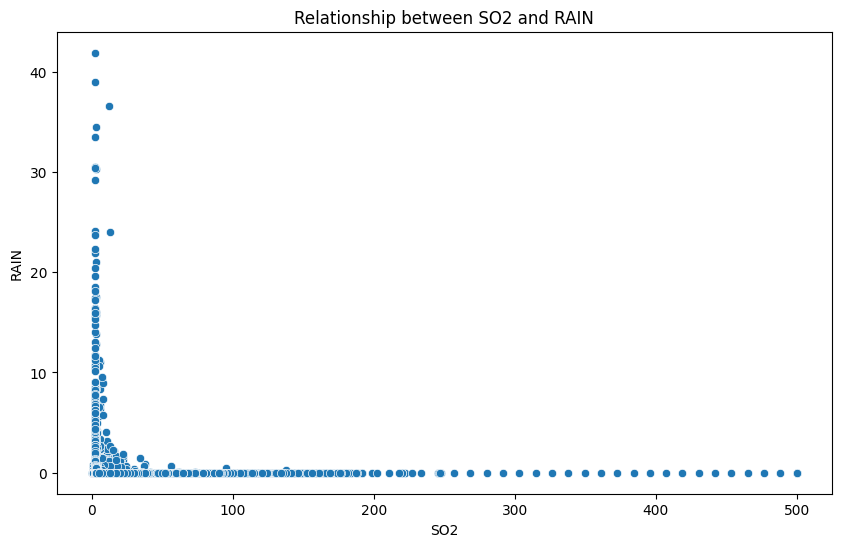

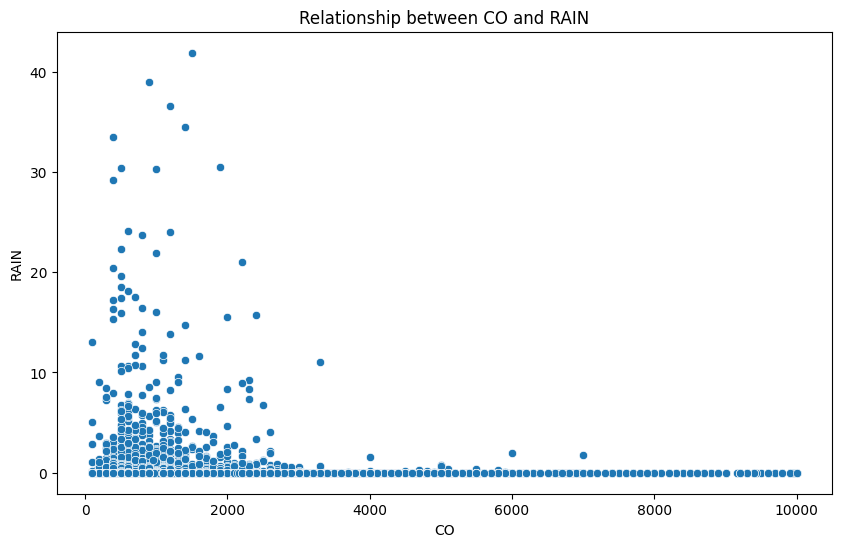

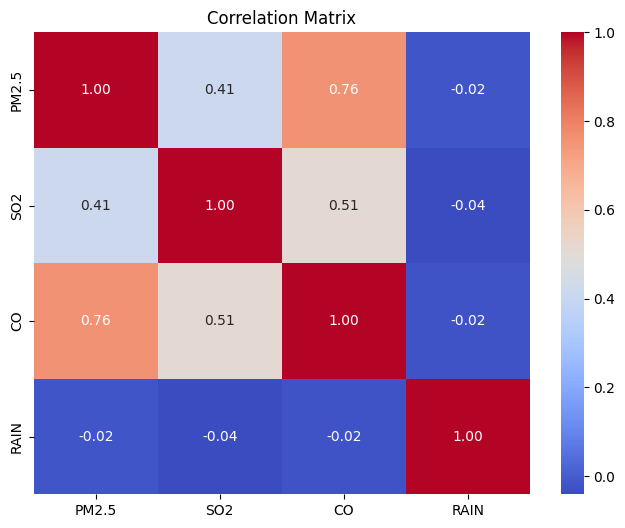

,PM2.5,SO2,CO,RAIN
PM2.5,1.000000,0.414348,0.757011,-0.020184
SO2,0.414348,1.000000,0.509732,-0.040623
CO,0.757011,0.509732,1.000000,-0.022101
RAIN,-0.020184,-0.040623,-0.022101,1.000000


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=air_quality_df, x='PM2.5', y='RAIN')
plt.title('Relationship between PM2.5 and RAIN')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=air_quality_df, x='SO2', y='RAIN')
plt.title('Relationship between SO2 and RAIN')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=air_quality_df, x='CO', y='RAIN')
plt.title('Relationship between CO and RAIN')
plt.show()

correlation_matrix = air_quality_df[['PM2.5', 'SO2', 'CO', 'RAIN']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

### Pertanyaan 2:

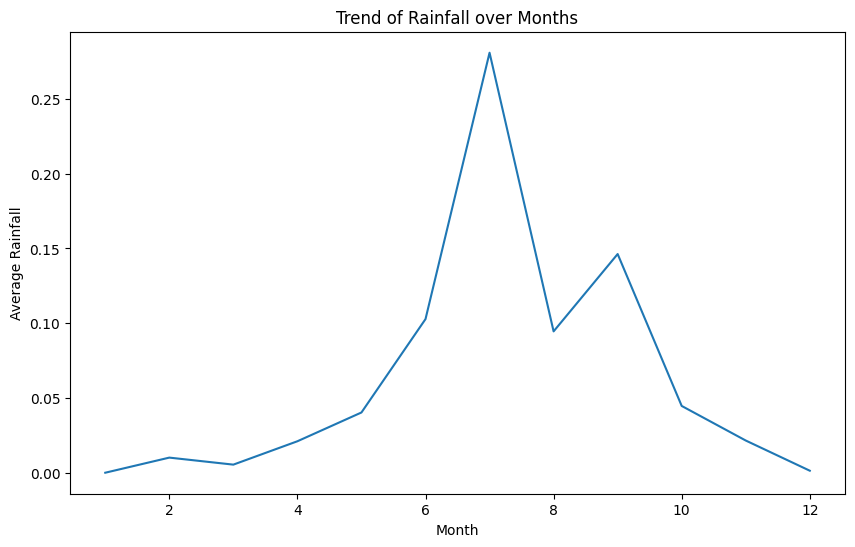

In [ ]:
monthly_rain = air_quality_df.groupby('month')['RAIN'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_rain.index, y=monthly_rain.values)
plt.title('Trend of Rainfall over Months')
plt.xlabel('Month')
plt.ylabel('Average Rainfall')
plt.show()


## Conclusion

- Terdapat hubungan negatif antara PM2.5, SO2, dan CO terhadap hujan di distrik Gucheng yang berarti semakin tinggi curah hujan maka semakin rendah polutan begitupun sebaliknya
- Terdapat satu puncak curah hujan yang sangat signifikan pada bulan ke-7. Ini mengindikasikan adanya musim hujan yang sangat terpusat pada bulan tersebut.